<a href="https://colab.research.google.com/github/Souherdya/SIH/blob/main/LSTM_trial.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
import pandas as pd
import matplotlib as plt
import numpy as np
import keras

In [2]:
df = pd.read_csv('/content/Data_trial.csv',index_col='Date',parse_dates=True)



In [3]:


df.head()

,Value
Date,
2002-01-01,3.82
2002-02-01,5.07
2002-03-01,5.42
2002-04-01,5.79
2002-05-01,5.40


<Axes: xlabel='Date'>

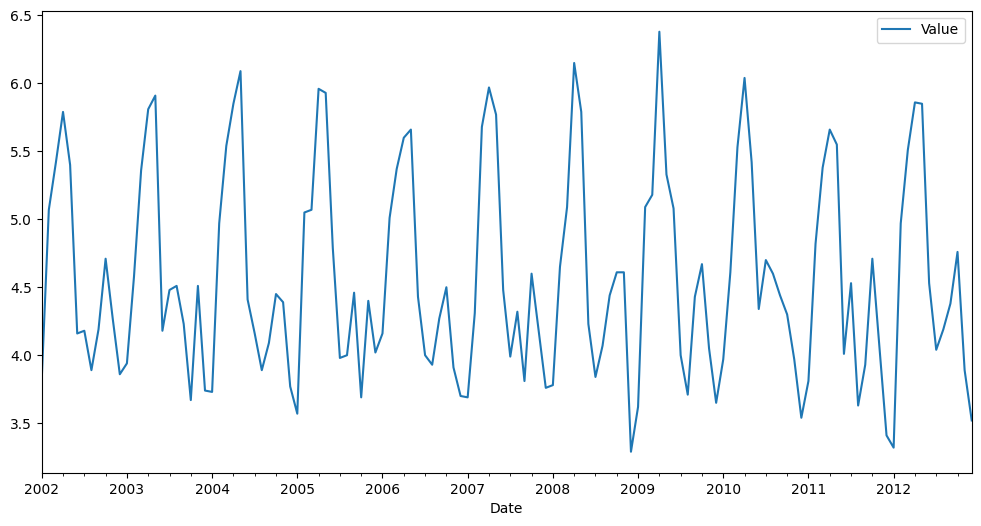

In [4]:
df.plot(figsize=(12,6))

In [5]:


from statsmodels.tsa.seasonal import seasonal_decompose

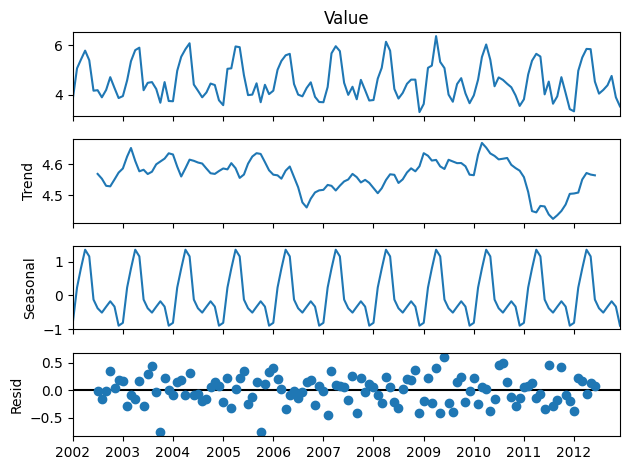

In [6]:
results = seasonal_decompose(df['Value'])
results.plot();

In [12]:
train = df.iloc[:121]
test = df.iloc[121:]

In [9]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [13]:
df.head(),df.tail()

(            Value
 Date             
 2002-01-01   3.82
 2002-02-01   5.07
 2002-03-01   5.42
 2002-04-01   5.79
 2002-05-01   5.40,
             Value
 Date             
 2012-08-01   4.19
 2012-09-01   4.38
 2012-10-01   4.76
 2012-11-01   3.89
 2012-12-01   3.52)

In [14]:
scaler.fit(train)
scaled_train = scaler.transform(train)
scaled_test = scaler.transform(test)

In [15]:
scaled_train[:10]

array([[0.17152104],
       [0.57605178],
       [0.68932039],
       [0.80906149],
       [0.6828479 ],
       [0.2815534 ],
       [0.28802589],
       [0.19417476],
       [0.29126214],
       [0.45954693]])

In [18]:

TimeseriesGenerator = tf.keras.preprocessing.sequence.TimeseriesGenerator;

In [19]:
# define generator
n_input = 12
n_features = 1
generator = TimeseriesGenerator(scaled_train, scaled_train, length=n_input, batch_size=1)

In [21]:
X,y = generator[1]
print(f'Given the Array: \n{X.flatten()}')
print(f'Predict this y: \n {y}')

Given the Array: 
[0.57605178 0.68932039 0.80906149]
Predict this y: 
 [[0.6828479]]


In [22]:
# We do the same thing, but now instead for 12 months
n_input = 12
generator = TimeseriesGenerator(scaled_train, scaled_train, length=n_input, batch_size=1)

In [23]:
Sequential = keras.models.Sequential;
Dense = keras.layers.Dense;
LSTM = keras.layers.LSTM;

In [24]:
# define model
model = Sequential()
model.add(LSTM(100, activation='relu', input_shape=(n_input, n_features)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [25]:
model.fit(generator,epochs=50)

Epoch 1/50
  7/109 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.1715

/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


109/109 ━━━━━━━━━━━━━━━━━━━━ 4s 20ms/step - loss: 0.1059
Epoch 2/50
109/109 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - loss: 0.0865
Epoch 3/50
109/109 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 0.0653
Epoch 4/50
109/109 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - loss: 0.0505
Epoch 5/50
109/109 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 0.0390
Epoch 6/50
109/109 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0335
Epoch 7/50
109/109 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0241
Epoch 8/50
109/109 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0198
Epoch 9/50
109/109 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0187
Epoch 10/50
109/109 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - loss: 0.0143
Epoch 11/50
109/109 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - loss: 0.0145
Epoch 12/50
109/109 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0165
Epoch 13/50
109/109 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0140
Epoch 14/50
109/109 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0138
Epoch 15/50
109/109 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 

In [26]:
loss_per_epoch = model.history.history['loss']


AttributeError: module 'matplotlib' has no attribute 'plot'

In [27]:
last_train_batch = scaled_train[-12:]

In [28]:
last_train_batch = last_train_batch.reshape((1, n_input, n_features))

In [29]:
model.predict(last_train_batch)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 182ms/step


array([[0.4371989]], dtype=float32)

In [36]:
test_predictions = []

first_eval_batch = scaled_train[-n_input:]
current_batch = first_eval_batch.reshape((1, n_input, n_features))

for i in range(len(test)):

    # get the prediction value for the first batch
    current_pred = model.predict(current_batch)[0]

    # append the prediction into the array
    test_predictions.append(current_pred)

    # use the prediction to update the batch and remove the first value
    current_batch = np.append(current_batch[:,1:,:],[[current_pred]],axis=1)

print(test_predictions)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
[array([0.4371989], dtype=float32), array([0.63780427], dtype=float32), array([0.7510187], dtype=float32), array([0.6896993], dtype=float32), array([0.29220518], dtype=float32), array([0.2958231], dtype=float32), array([0.23704466], dtype=float32), array([0.22454524], dtype=float32), array([0.26465118], dtype=float32), array([0.21756008], dtype=float32), array([0.19762659], dtype=float32)]


In [40]:
true_predictions = scaler.inverse_transform(test_predictions)
print(len(true_predictions))
print(len(test))

11
11


In [43]:
test['Predictions'] = true_predictions

<ipython-input-43-920b79c3c314>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['Predictions'] = true_predictions


<Axes: xlabel='Date'>

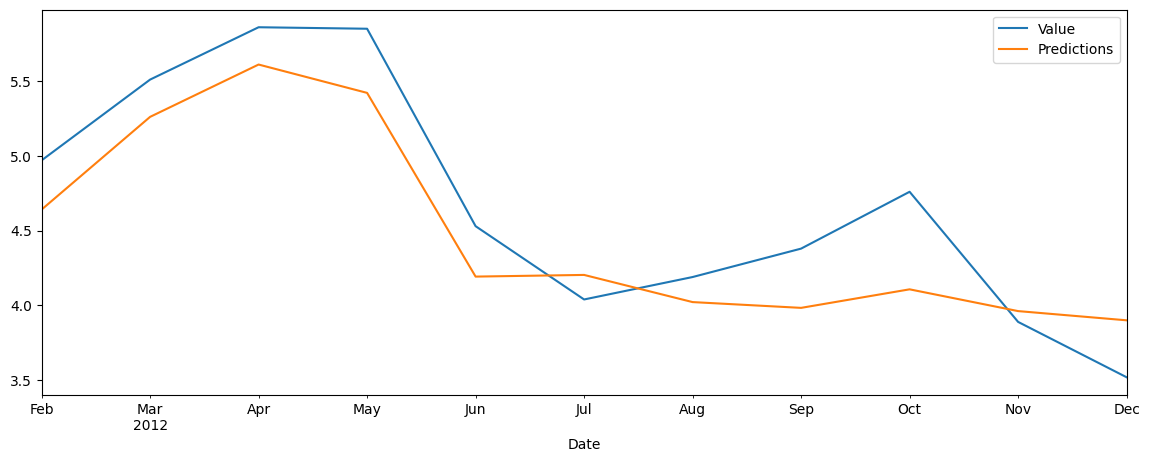

In [44]:
test.plot(figsize=(14,5))